# Habituation Dishabituation Data

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
import seaborn as sns
import scipy.stats as stats


# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *
from hab_dishab_extension import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc_csvs"
brain_region = '#FFAF00'


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs"
# brain_region = '#15616F'

In [3]:
# Define the time segments to remove for specific subjects
time_segments_to_remove = {
    'n6': [(150,200)],
    'n7': [(90, 130)],
    'n5': [(310,326)]
}


In [4]:
group_data = GroupTDTData(experiment_path, csv_base_path)
# Batch process the data, removing the specified time segments for subjects
group_data.batch_process(time_segments_to_remove=time_segments_to_remove)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p4-240516-083255\Notes.txt
read from t=0s to t=1773.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse no

In [5]:
group_data.hab_dishab_processing()

Hab_Dishab Processing p1-240516-064158...
Hab_Dishab Processing p2-240516-071921...
Hab_Dishab Processing p3-240516-075659...
Hab_Dishab Processing p4-240516-083255...
Hab_Dishab Processing p5-240821-092649...
Hab_Dishab Processing p6-240821-103616...
Hab_Dishab Processing p7-240821-111323...
Hab_Dishab Processing p8-240821-121933...


## Total duration

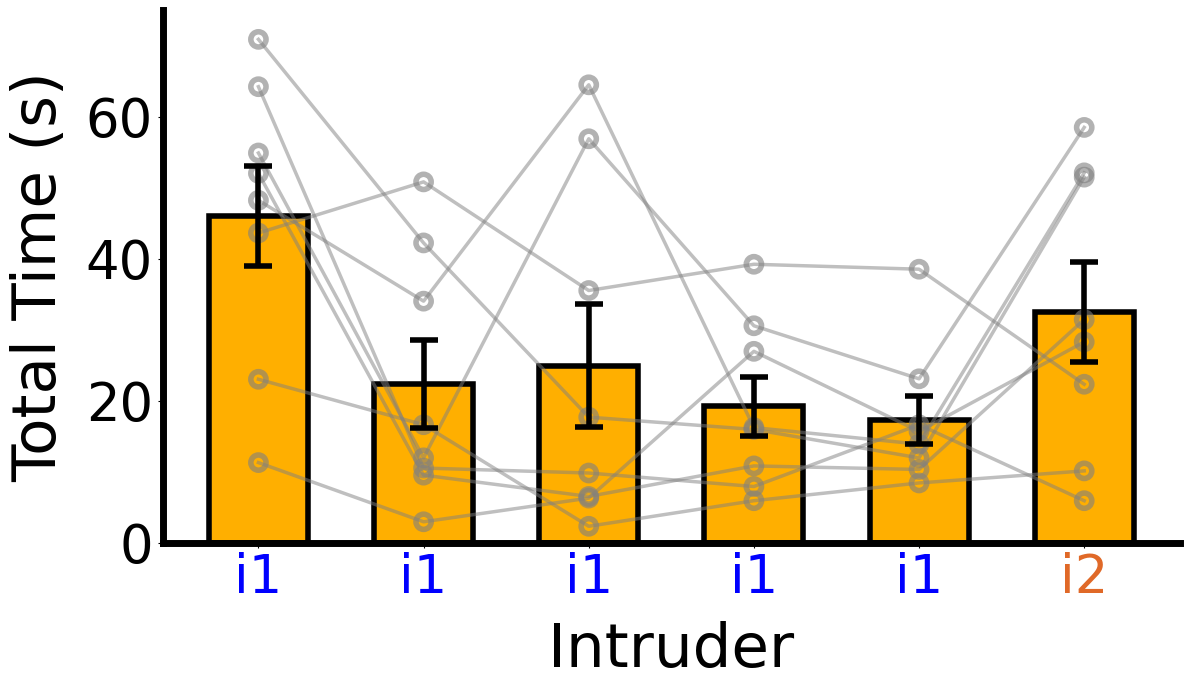

In [6]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
custom_xtick_labels = ['i1', 'i1','i1','i1','i1','i2',]
custom_xtick_colors = ['blue', 'blue', 'blue', 'blue', 'blue', '#E06928']
avg_inv_tot_duration_df = hd_extract_total_behavior_durations(group_data=group_data, bouts=bouts, behavior = 'Investigation')

# avg_inv_tot_duration_df
hab_dishab_plot_y_across_bouts_gray(avg_inv_tot_duration_df, '','Total Time (s)',custom_xtick_labels=custom_xtick_labels,
                         custom_xtick_colors=custom_xtick_colors, bar_color=brain_region, xlabel = 'Intruder',ylim=(0,75))

In [7]:
# Assuming you've already loaded your data into avg_inv_tot_duration_df

# Extracting the relevant bouts
bout_1_data = avg_inv_tot_duration_df['s1_1']
bout_2_data = avg_inv_tot_duration_df['s1_2']
bout_5_data = avg_inv_tot_duration_df['s1_5']
bout_6_data = avg_inv_tot_duration_df['s2_1']

# Performing paired t-tests
t_stat_1, p_value_1 = stats.ttest_rel(bout_1_data, bout_2_data)
t_stat_2, p_value_2 = stats.ttest_rel(bout_5_data, bout_6_data)

# Output the results
print(f'T-test between bout 1 and bout 2: t-statistic = {t_stat_1:.4f}, p-value = {p_value_1:.4f}')
print(f'T-test between bout 5 and bout 6: t-statistic = {t_stat_2:.4f}, p-value = {p_value_2:.4f}')


T-test between bout 1 and bout 2: t-statistic = 3.1204, p-value = 0.0168
T-test between bout 5 and bout 6: t-statistic = -1.9484, p-value = 0.0924


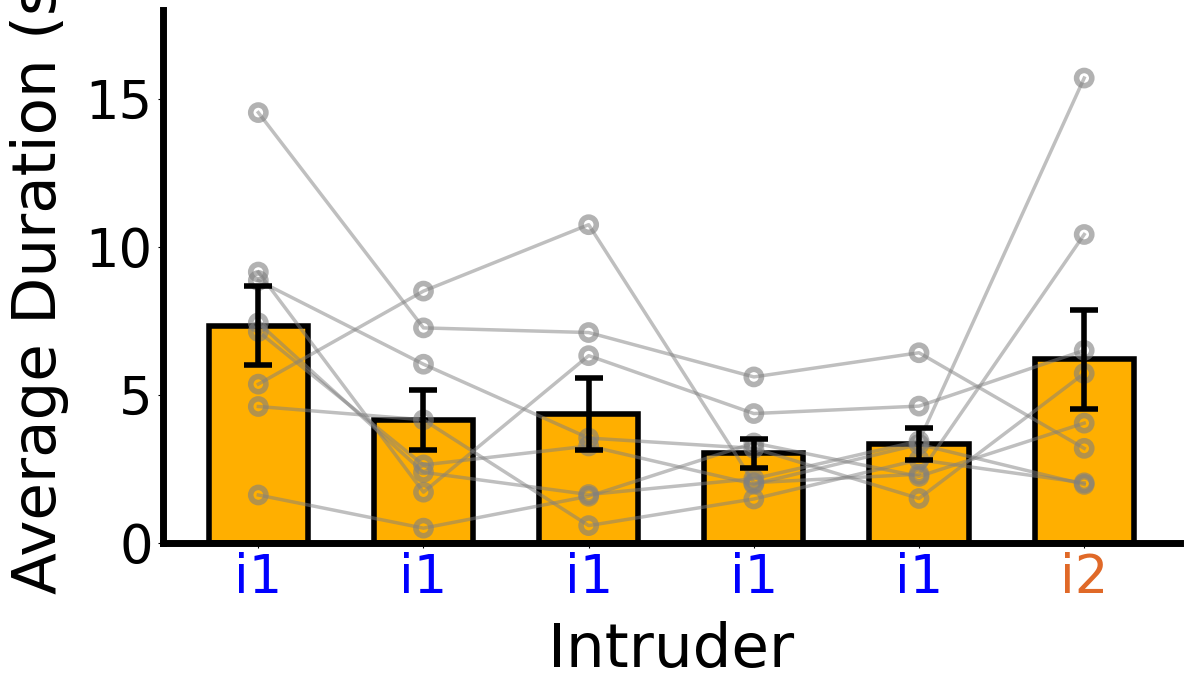

In [8]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
custom_xtick_labels = ['i1', 'i1','i1','i1','i1','i2',]
# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=bouts, behavior='Investigation')

hab_dishab_plot_y_across_bouts_gray(avg_inv_duration_df, '','Average Duration (s)', custom_xtick_labels=custom_xtick_labels,bar_color=brain_region,ylim=(0,18)
                         ,custom_xtick_colors=custom_xtick_colors, pad_inches=1)


In [9]:
# Assuming you've already loaded your data into avg_inv_tot_duration_df

# Extracting the relevant bouts
bout_1_data = avg_inv_duration_df['s1_1']
bout_2_data = avg_inv_duration_df['s1_2']
bout_5_data = avg_inv_duration_df['s1_5']
bout_6_data = avg_inv_duration_df['s2_1']

# Performing paired t-tests
t_stat_1, p_value_1 = stats.ttest_rel(bout_1_data, bout_2_data)
t_stat_2, p_value_2 = stats.ttest_rel(bout_5_data, bout_6_data)

# Output the results
print(f'T-test between bout 1 and bout 2: t-statistic = {t_stat_1:.4f}, p-value = {p_value_1:.4f}')
print(f'T-test between bout 5 and bout 6: t-statistic = {t_stat_2:.4f}, p-value = {p_value_2:.4f}')


T-test between bout 1 and bout 2: t-statistic = 2.4899, p-value = 0.0416
T-test between bout 5 and bout 6: t-statistic = -1.5632, p-value = 0.1620


## Mean DA During 1st Investigation

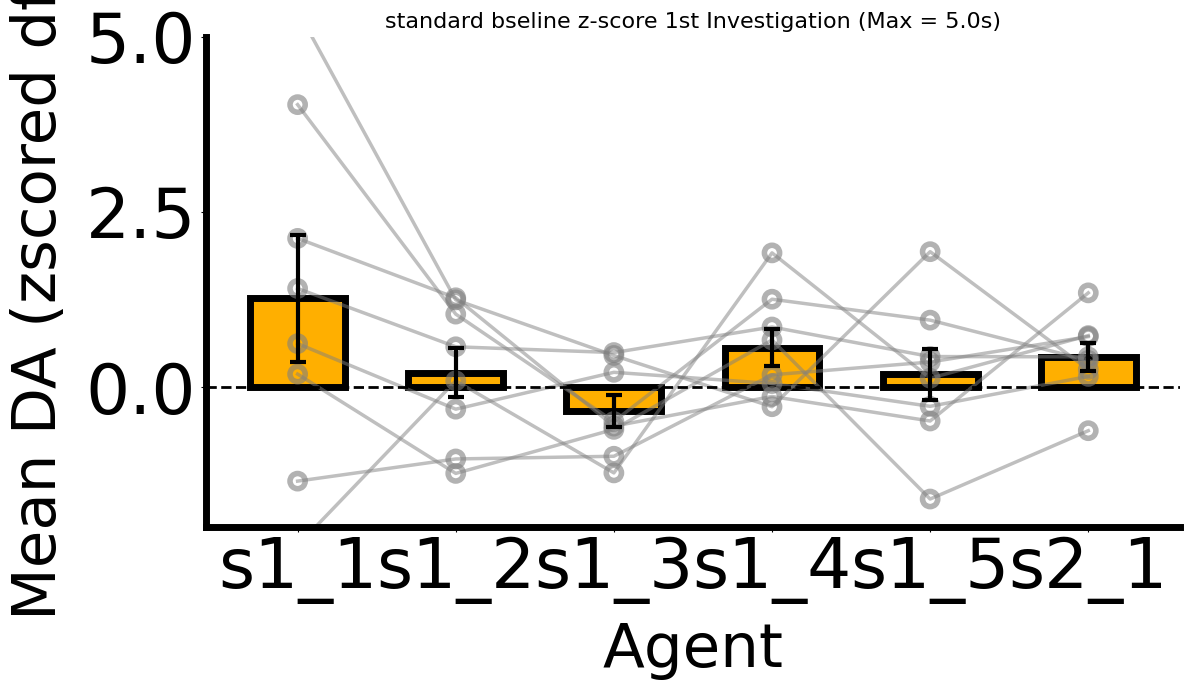

In [10]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=bouts, behavior='Investigation', n=1, max_duration=0.6)

plot_y_across_bouts_gray(inv_1st_mean_df, 'standard bseline z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)',bar_color=brain_region,ylim=(-2,5))


## PETHC CODE

Truncated PETH for block 'p6-240821-103616', bout 's1_2' to 8138 bins.


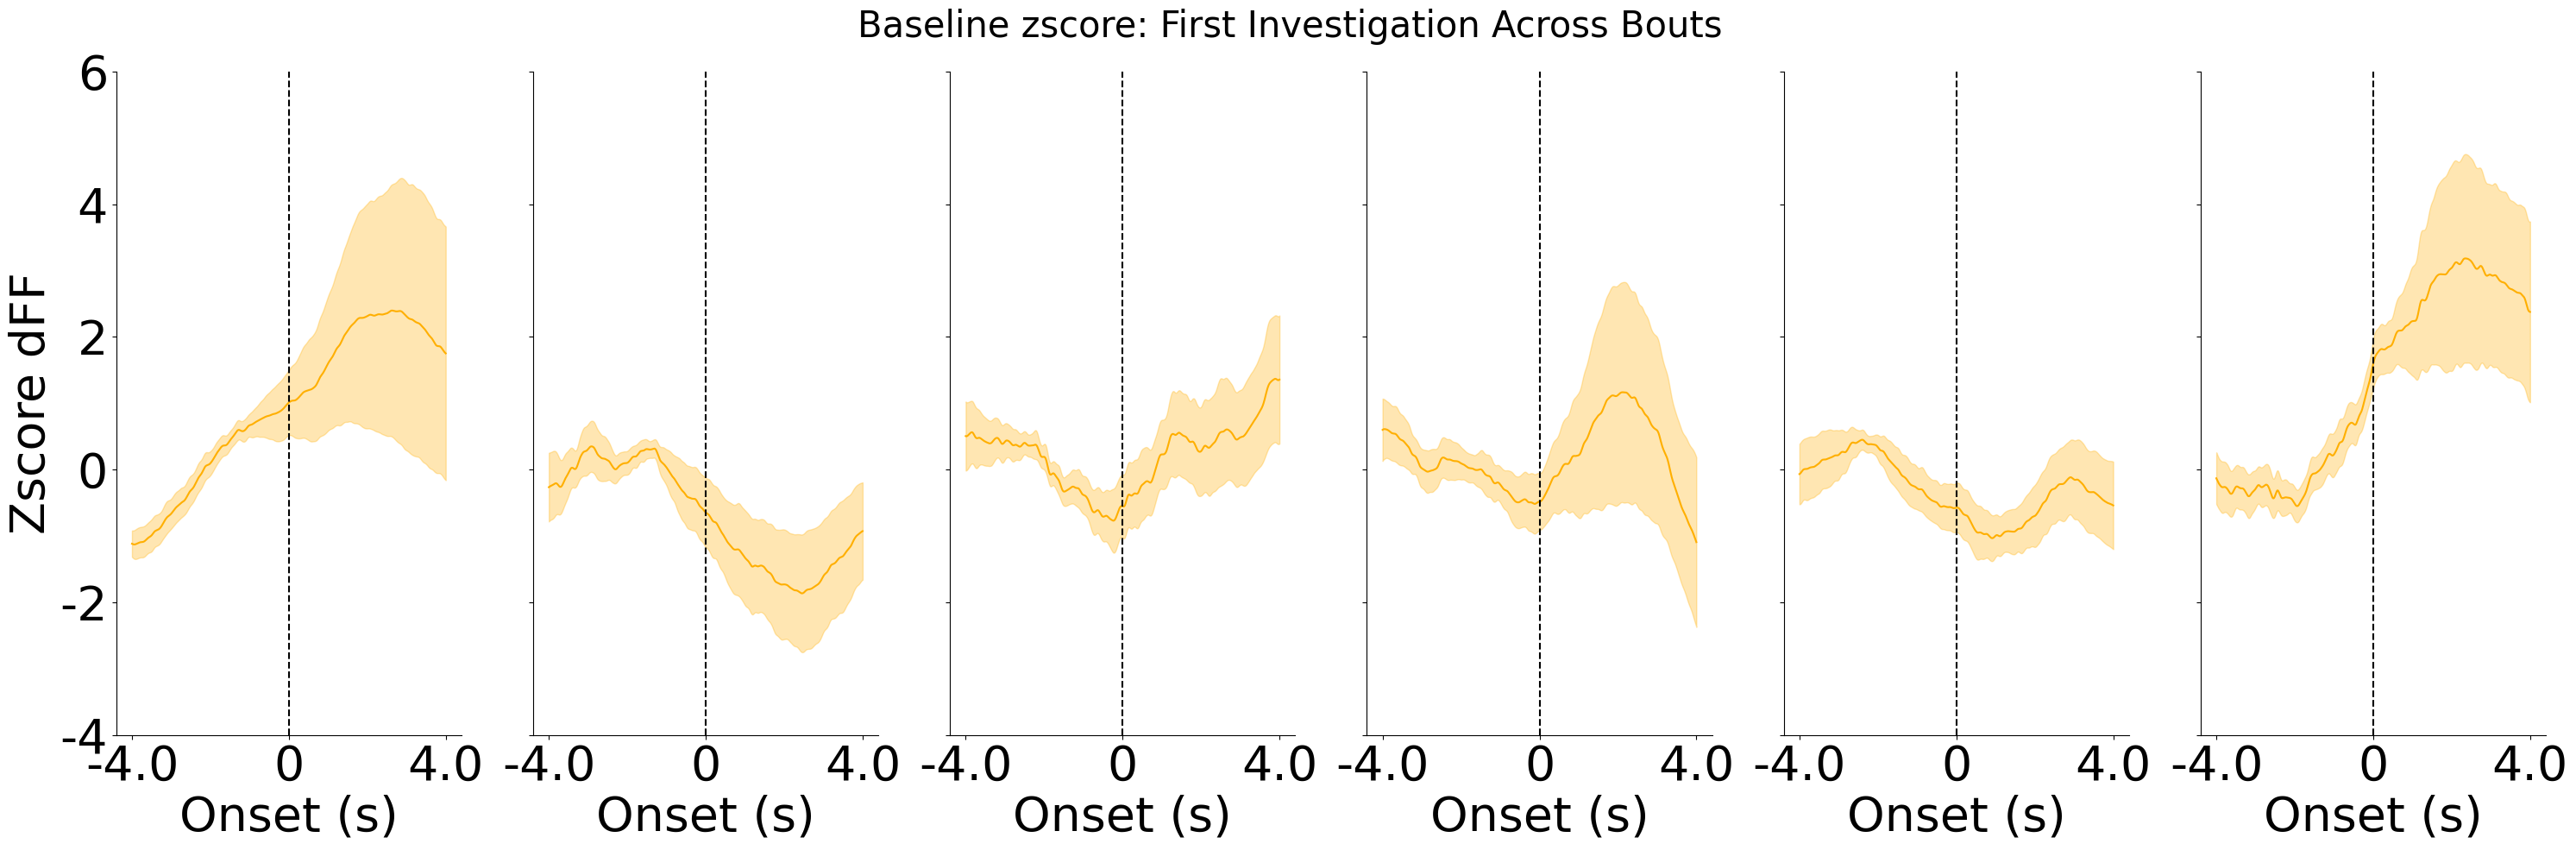

In [11]:
group_data.compute_nth_bout_peth_all_blocks(behavior_name='Investigation', nth_occurrence=1, bouts=bouts, pre_time=4, post_time=4)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=bouts,
                                title='Baseline zscore: First Investigation Across Bouts',color=brain_region
                                ,display_pre_time=4, display_post_time=4)


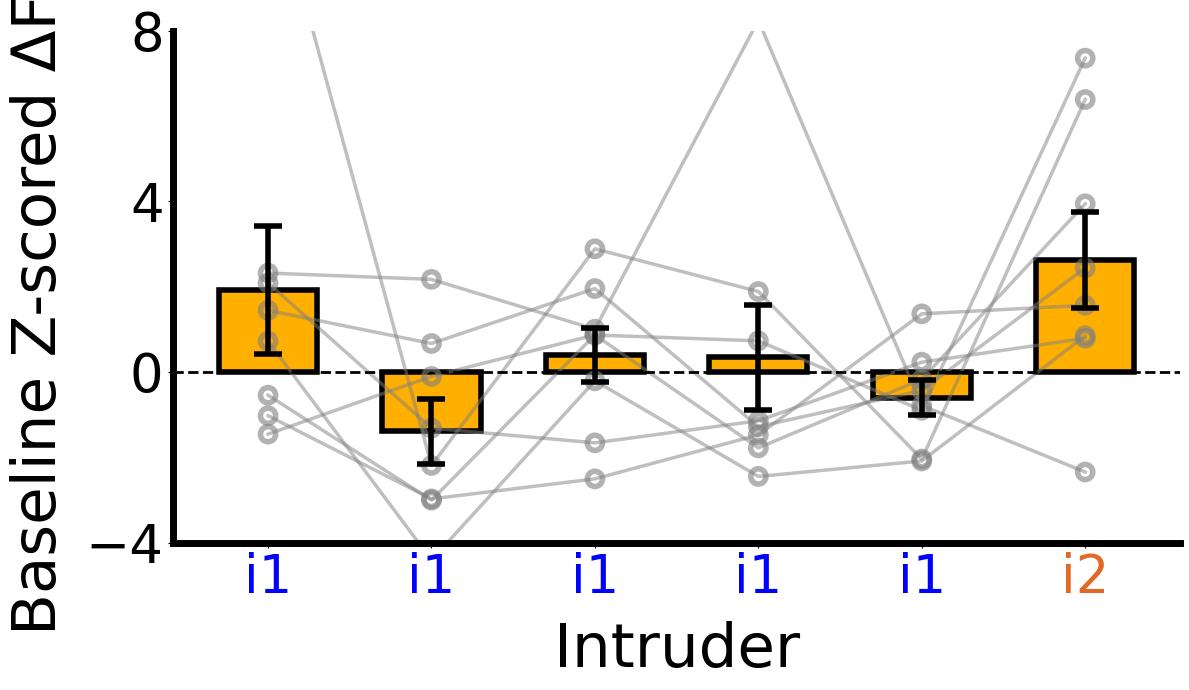

In [12]:
#relative Baseline zscore 1st Investigation (+-4)
custom_labels = ['i1','i1','i1','i1','i1','i2']
df = extract_nth_behavior_mean_baseline_peth(group_data=group_data, bouts=bouts,behavior='Investigation',n=1, windows=[(0,4)], pre_time=4, post_time=4)

hab_dishab_plot_y_across_bouts_gray(df,title='',ylabel='Baseline Z-scored ΔF/F', custom_xtick_labels = custom_labels,custom_xtick_colors=custom_xtick_colors,bar_color=brain_region, ylim= (-4, 8),
                                     yticks_increment=4, xlabel='Intruder', pad_inches=1)

In [13]:
df

s1_1_0s_to_4s  s1_2_0s_to_4s  s1_3_0s_to_4s  s1_4_0s_to_4s  \
Subject                                                               
p1           11.842611      -2.191437       2.884066       1.884133   
p2            2.084154      -1.318263      -1.662131      -1.145284   
p3            0.719882      -4.406486      -0.207898      -2.449321   
p4            2.316513       2.168485       1.000357       8.239732   
p5           -0.545458      -3.004937       0.865008       0.727763   
p6            1.442874       0.665720       1.953580      -1.281348   
p7           -1.458471      -0.105379       0.866954      -1.780381   
p8           -1.025242      -2.975516      -2.506135      -1.476638   

         s1_5_0s_to_4s  s2_1_0s_to_4s  
Subject                                
p1           -2.042731       6.382546  
p2            0.228035       0.788454  
p3           -2.086974       0.846687  
p4           -0.787147      -2.345638  
p5           -0.897842       7.352716  
p6           -0.433438       2.436637  
p7           -0.172248       3.938745  
p8            1.360982       1.561708

In [14]:
# Extracting the relevant bouts
bout_1_data = df['s1_1_0s_to_4s']
bout_2_data = df['s1_2_0s_to_4s']
bout_5_data = df['s1_5_0s_to_4s']
bout_6_data = df['s2_1_0s_to_4s']

# Performing paired t-tests
t_stat_1, p_value_1 = stats.ttest_rel(bout_1_data, bout_2_data)
t_stat_2, p_value_2 = stats.ttest_rel(bout_5_data, bout_6_data)

# Output the results
print(f'T-test between bout 1 and bout 2: t-statistic = {t_stat_1:.4f}, p-value = {p_value_1:.4f}')
print(f'T-test between bout 5 and bout 6: t-statistic = {t_stat_2:.4f}, p-value = {p_value_2:.4f}')


T-test between bout 1 and bout 2: t-statistic = 1.9689, p-value = 0.0896
T-test between bout 5 and bout 6: t-statistic = -2.5097, p-value = 0.0404


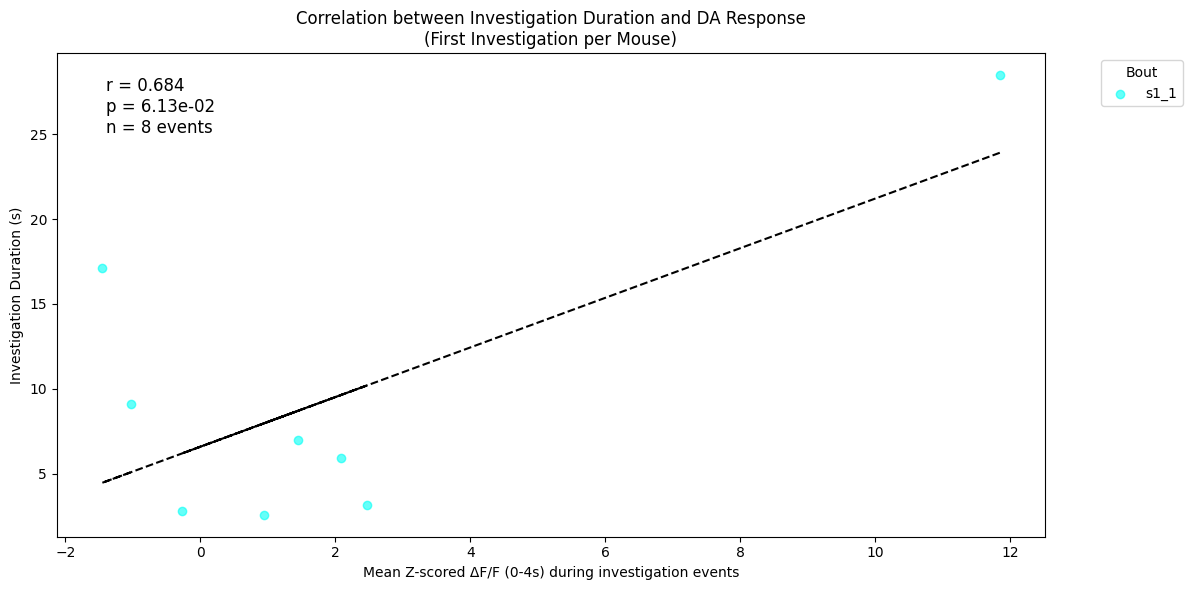

In [15]:
group_data.plot_first_investigation_vs_dff(bouts=['s1_1'])

## All Investigations

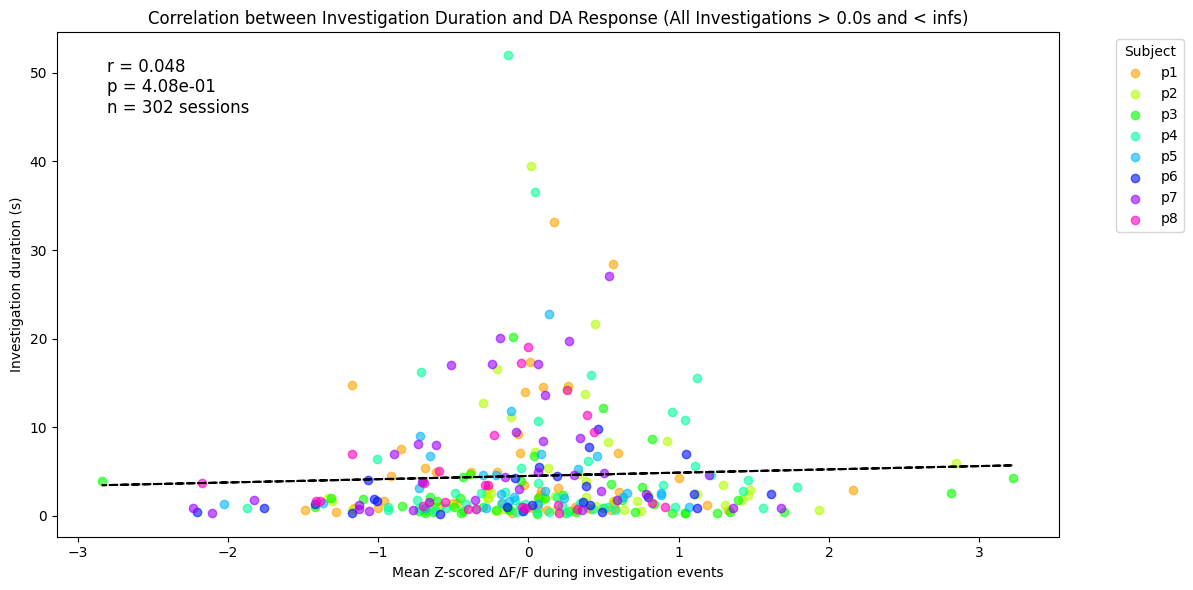

In [16]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.0, max_duration=np.inf)

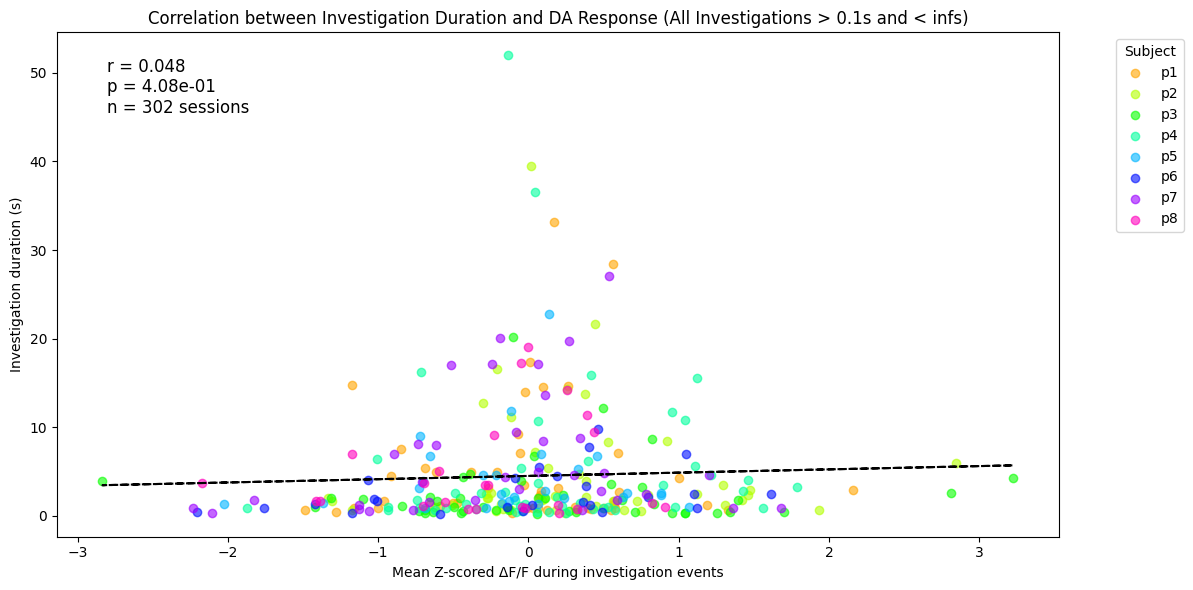

In [17]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.1, max_duration=np.inf)

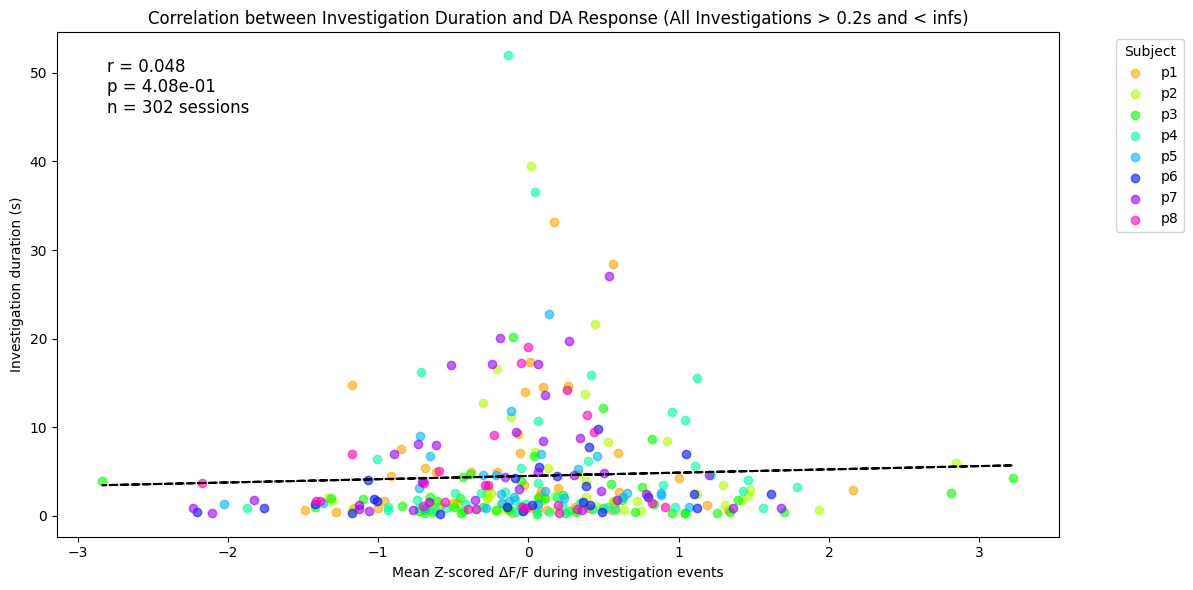

In [18]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0.2, max_duration=np.inf)

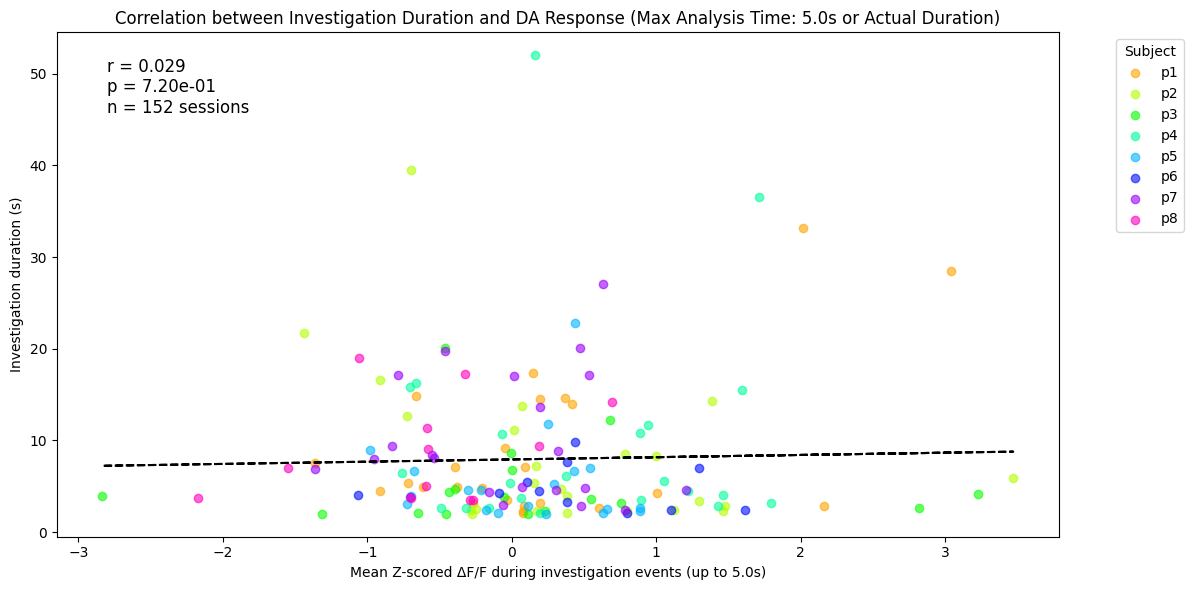

In [19]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=2, max_analysis_time=5.0)

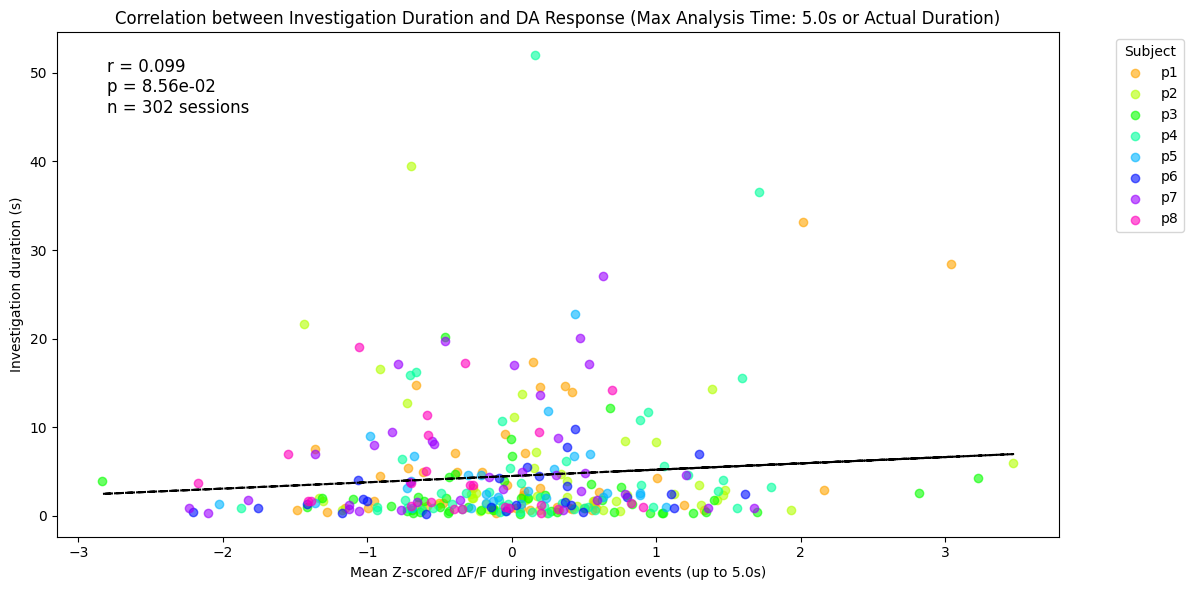

In [20]:
group_data.plot_all_behavior_vs_dff_all_with_flexible_time(behavior_name='Investigation', min_duration=0.1, max_analysis_time=5.0)

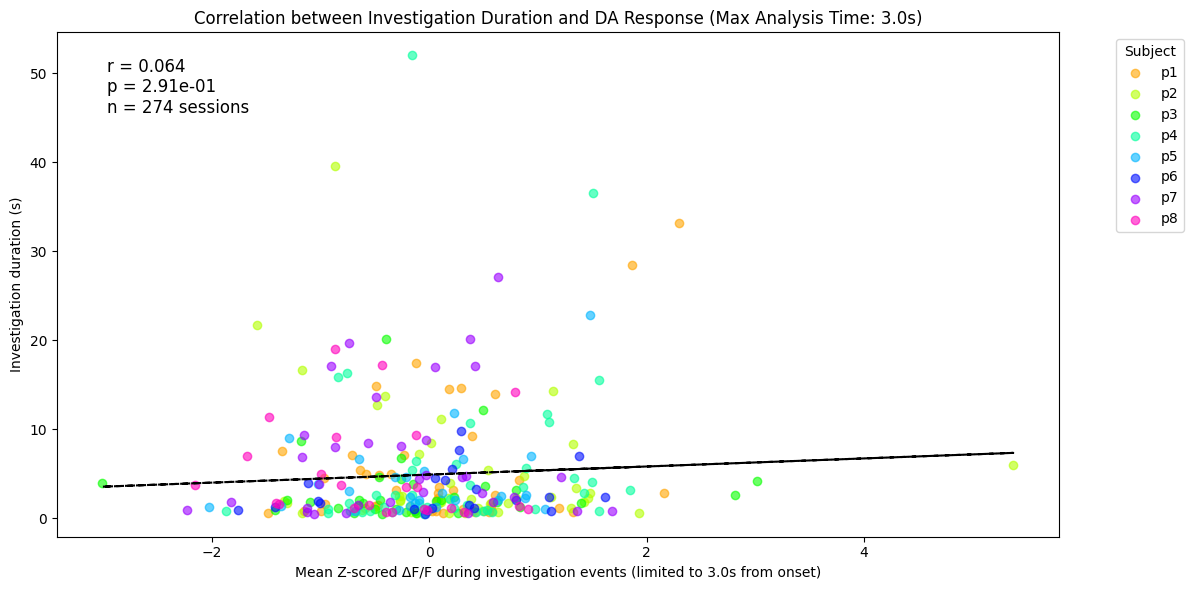

In [21]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.5, max_analysis_time=3.0)


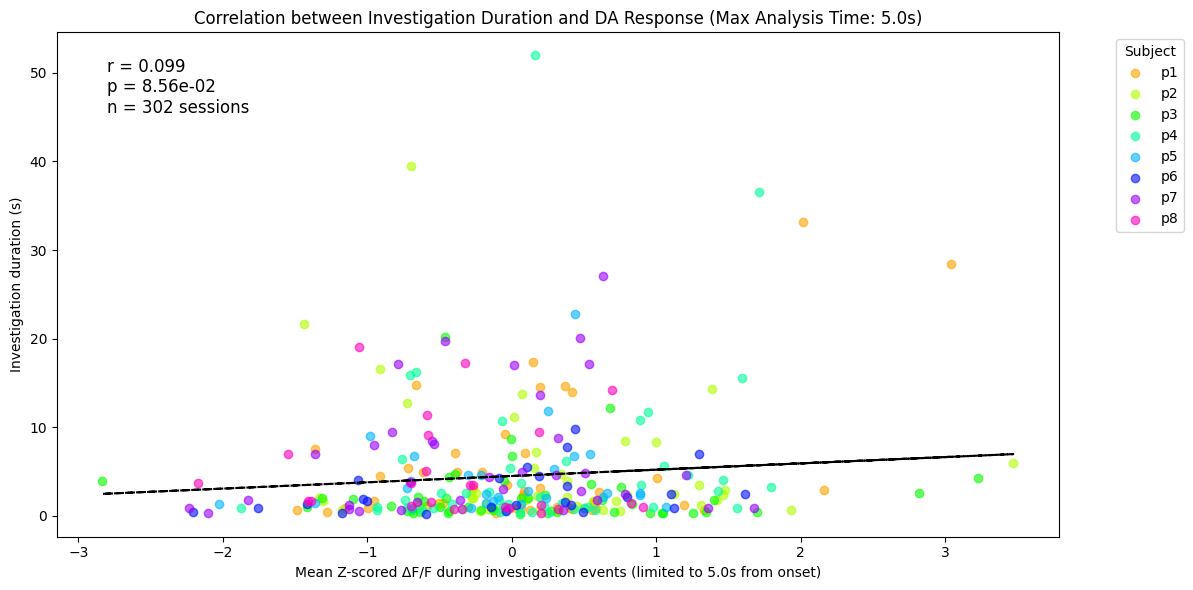

In [22]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=5.0)


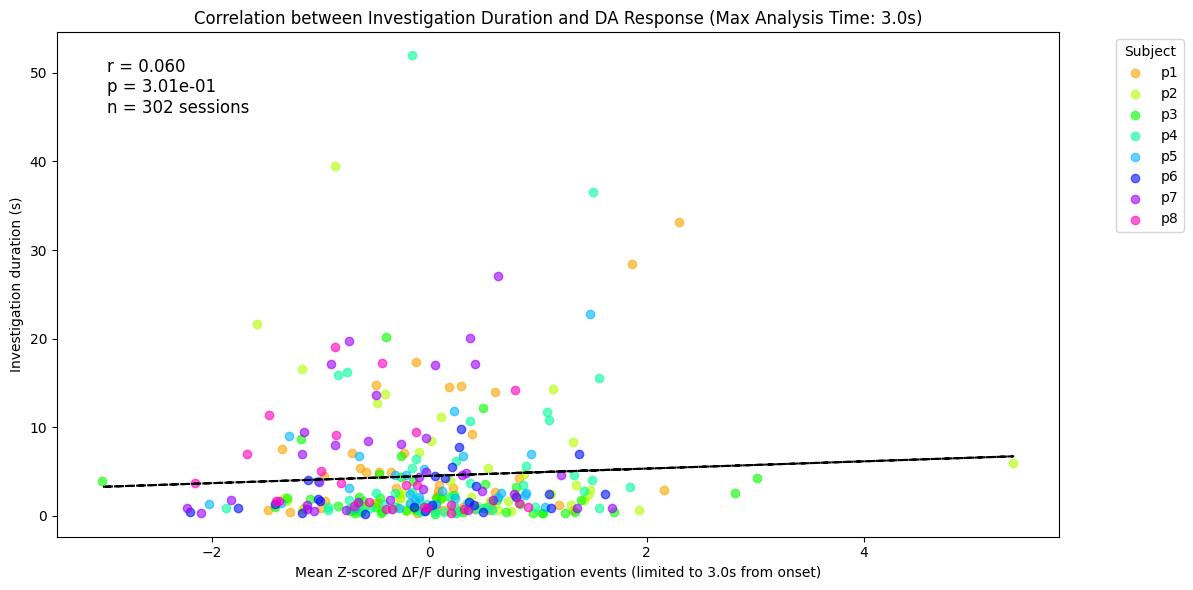

In [23]:
group_data.plot_all_behavior_vs_dff_all_max_time(behavior_name='Investigation', min_duration=0.0, max_analysis_time=3.0)


In [24]:
group_data.plot_1st_behavior_vs_dff_all( behavior_name='Investigation', min_duration=0.15, max_duration=np.inf)

AttributeError: 'GroupTDTData' object has no attribute 'plot_1st_behavior_vs_dff_all'

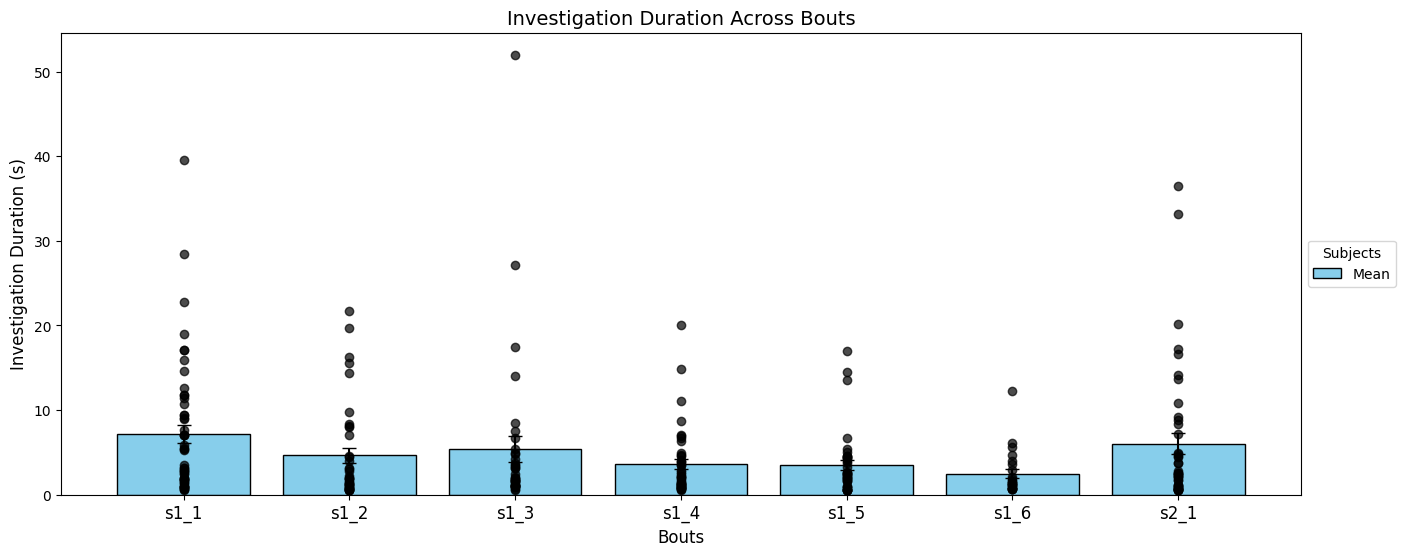

In [25]:
group_data.plot_behavior_durations_boutwise(behavior_name='Investigation', min_duration=0)

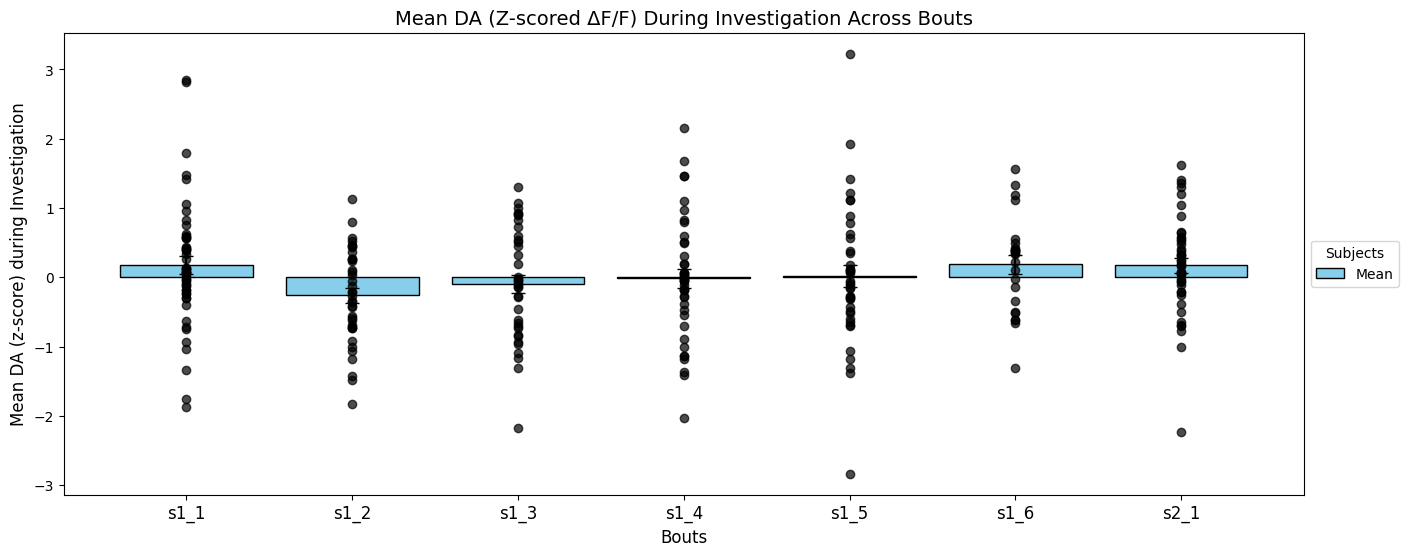

In [26]:
group_data.plot_behavior_mean_DA_boutwise(behavior_name='Investigation', min_duration=0)


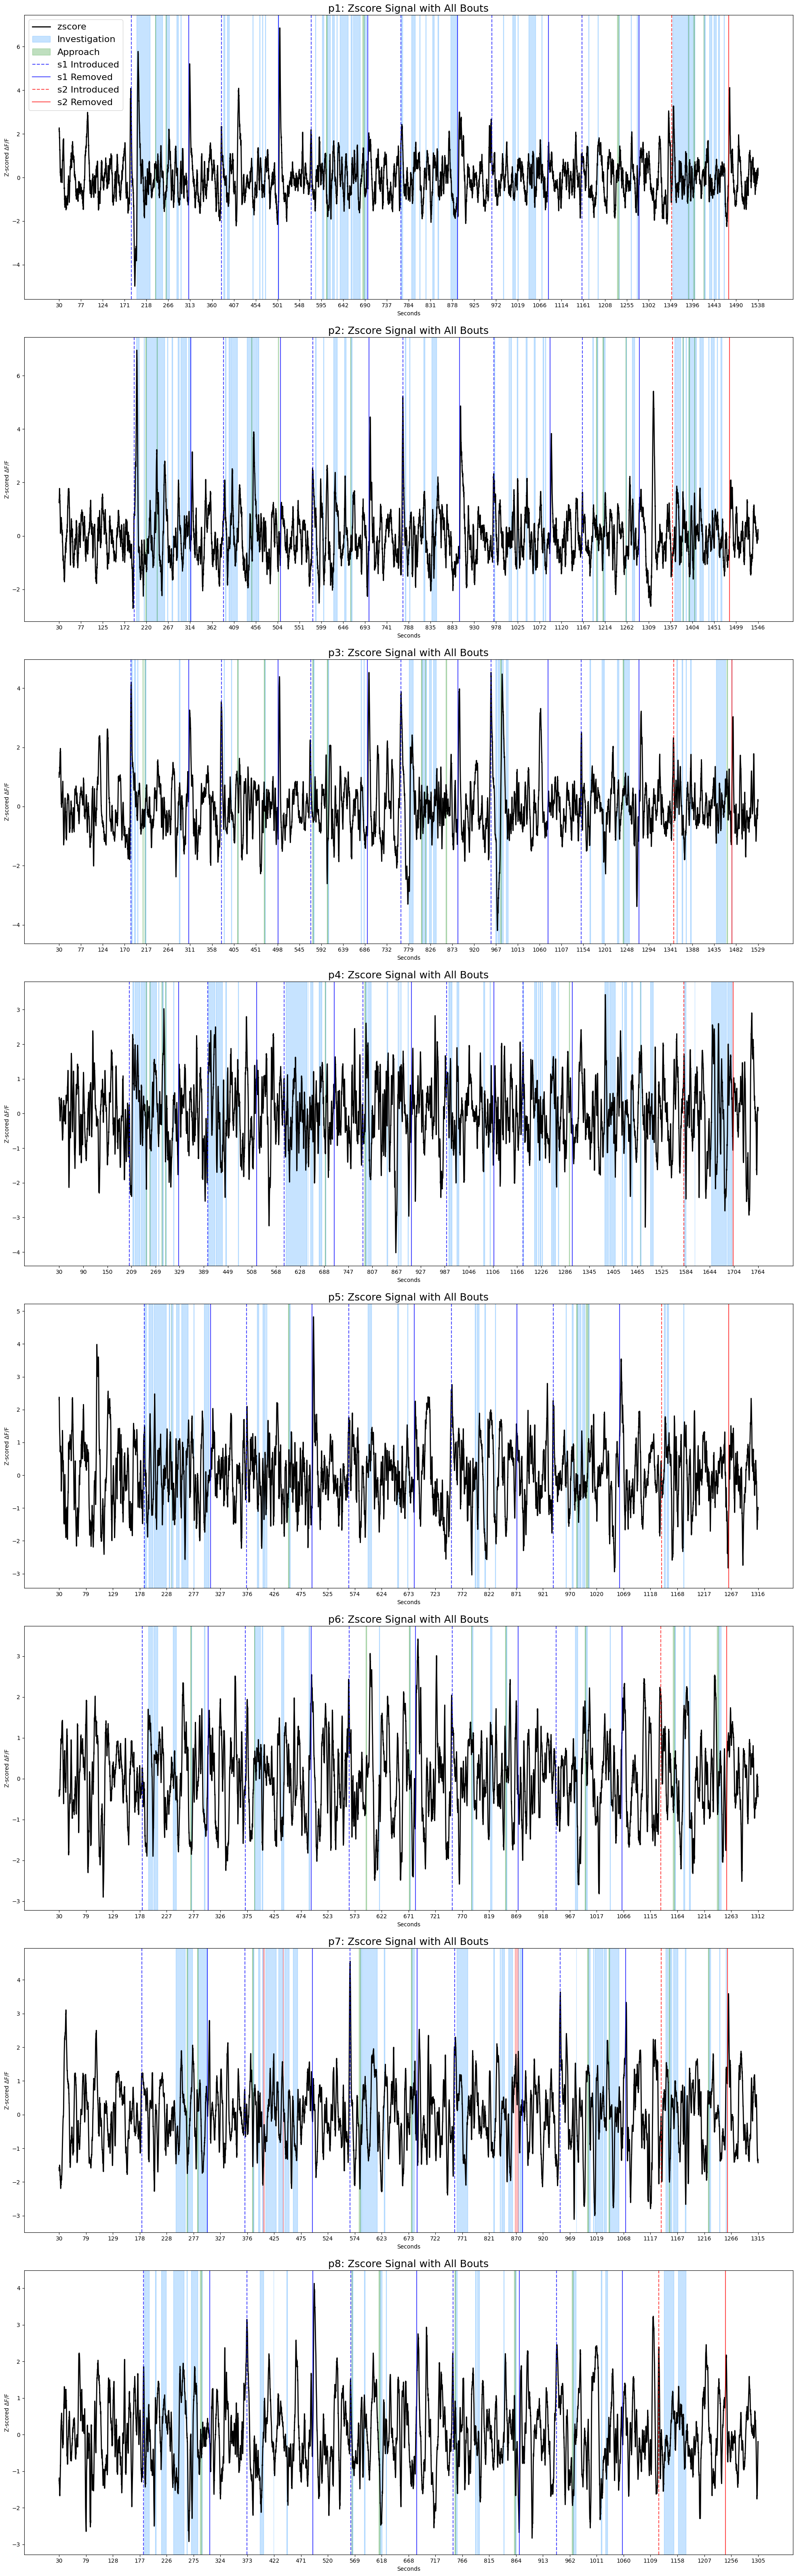

In [27]:
group_data.hab_dishab_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))